# Elias Analytics Titanic Dataset ML Analysis
**Author:** Nick Elias  
**Date:** 3/28/25  
**Objective:** To develop and evaluate machine learning models that predict passenger survival on the Titanic, while exploring the relationships between various passenger characteristics and survival rates.

## Introduction


## Section 1. Import and Inspect the Data
In the code cell below, import the necessary Python libraries for this notebook.  

In [ ]:
''' Imports for the Titanic dataset '''

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
from pandas.plotting import scatter_matrix

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

In [ ]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [ ]:
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

## 2.2 Feature Engineering
### New features:

* Add family_size - number of family members on board
* Convert categorical "sex" to numeric
* Convert categorical "embarked" to numeric
* Binary feature - convert "alone" to numeric

In [ ]:
# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

# Section 3. Feature Selection and Justification

### 3.1 Choose features and target
* Select two or more input features (numerical for regression, numerical and/or categorical for classification)
* Use survived as the target. 
* We will do three input cases like the example. 

### First:

* input features: alone
* target: survived

### Second:

* input features - age (or another variable of your choice)
* target: survived

### Third:

* input features -  age and family_size (or another combination of your choice)
* target: survived

## 3.2 Define X (features) and y (target)
* Assign input features to X a pandas DataFrame with 1 or more input features
* Assign target variable to y (as applicable) - a pandas Series with a single target feature
* Again - use comments to run a single case at a time
* The follow starts with only the statements needed for case 1. 
* Double brackets [[ ]]]  makes a 2D DataFrame
* Single brackets [ ]  make a 1D Series
 

### Case 1: alone only 
* X = titanic[['alone']]
* y = titanic['survived']

### Case 2: age only (or your choice)
* X = titanic[['age']]
* y = titanic['survived']

### Case 3: age + family_size (or your choice)
* X = titanic[['age', 'family_size']]
* y = titanic['survived']

In [ ]:
### Case 1: alone only 
#X = titanic[['alone']]
#y = titanic['survived']



### Case 2: age only (or your choice)
#X = titanic[['age']]
#y = titanic['survived']



### Case 3: age + family_size (or your choice)
#X = titanic[['age', 'family_size']]
#y = titanic['survived']

## Reflection 3:

* Why are these features selected?
  * They are interesting features that could potentially help predict survival
* Are there features that are likely to be highly predictive of survival?
  * I think family size and age will be highly predictive

# Section 4. Train a Classification Model (Decision Tree)

## 4.1 Split the Data
Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [ ]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

## 4.2 Create and Train Model (Decision Tree)
Create and train a decision tree model with no random initializer argument.

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

In [ ]:
# Evaluate model performance on test data:

# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

## 4.4 Report Confusion Matrix (as a heatmap)

In [ ]:
# Plot a confusion matrix:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

## 4.5 Report Decision Tree Plot
Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

In [ ]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("caseone_decision_tree_titanic.png")

Repeat for All 3 Cases
Try this for the 3 different cases: 
1) using height as the only input  
2) using weight as the only input 
3) using height and weight together as inputs. 

For each different case, redefine the input features in Section 3 (comment out the old case inputs X and target y and uncomment the new case inputs X and target y), then re-run Sections 4 and 5 for each case. Record your results in a Markdown table.

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 63% | 61% | 62% | 61% | - |
|                   | Case 2 | age | 61% | 57% | 53% | 50% | - |
|                   | Case 3 | age + family_size | 59% | 55 % | 55% | 54% | - |

## Reflection 4:
* How well did the different cases perform?
  * Alone was best, then age, then age+family_size

* Are there any surprising results?
  * Alone as a boolean variable provides less information than age and family size, yet it had the most positive impact on accuracy

* Which inputs worked better? 
  * Alone performed best with 63% accuracy and 61% F1-score

# Section 5. Compare Alternative Models (SVC, NN)

In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

### SVC Kernel: Common Types

* RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)
* Linear – Best for linearly separable data (straight line separation)
* Polynomial – Useful when the data follows a curved pattern
* Sigmoid – Similar to a neural network activation function; less common

Commenting the options in and out in the code can be helpful. The analyst decides which to use based on their understanding of the results. 

In [1]:
''' Imports for the Titanic dataset '''

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
from pandas.plotting import scatter_matrix

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

titanic['age'].fillna(titanic['age'].median(), inplace=True)


titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

C:\Users\drumm\AppData\Local\Temp\ipykernel_33172\3551493040.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\drumm\AppData\Local\Temp\ipykernel_33172\3551493040.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [ ]:
### Case 1: alone only 
#X = titanic[['alone']]
#y = titanic['survived']



### Case 2: age only (or your choice)
#X = titanic[['age']]
#y = titanic['survived']



### Case 3: age + family_size (or your choice)
#X = titanic[['age', 'family_size']]
#y = titanic['survived']


splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

### SVC Kernel: How to Choose

* Start with linear if you suspect the data is linearly separable.
* Use RBF if the data is complex or you aren’t sure.
* Try polynomial if the data seems to follow a curved boundary.
* Use sigmoid for experiments (rarely the best choice).

### SVC Kernel: Common Issues and Techniques

* If the model takes too long to train, reduce the degree for polynomial kernels.
* If support_vectors_ gives an error, the data may not be separable with the current kernel. Try switching to RBF or adjusting the C (regularization) value.
* If the model misclassifies many points, then increase/decrease gamma or C.
Your process is valuable - record the work you do and the temporary results in your reflections and insights. To show your skills, show and tell us about your analysis process. Professional communication is key.

## 5.1 Train and Evaluate Model (SVC)  

In [ ]:
# First, train an SVC model using the default kernel.

###############################################################
# RBF Kernel (default) - same as calling SVC()

#svc_model = SVC(kernel='rbf')
#svc_model.fit(X_train, y_train)

###############################################################
# Linear Kernel

#svc_model = SVC(kernel='linear')
#svc_model.fit(X_train, y_train)

###############################################################
# Polynomial Kernel (e.g., with degree=3)

#svc_model = SVC(kernel='poly', degree=3)
#svc_model.fit(X_train, y_train)

###############################################################
# Sigmoid Kernel

svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

###############################################################

In [ ]:
# Predict and evaluate the SVC model:

y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

### Visualize Support Vectors
Create a scatter plot to visualize the support vectors. This helps understand how the SVM model separates the data.

### Step-by-Step Process:

1) Split the data into two groups:

* Survived – Passengers who survived the Titanic sinking (value = 1).
* Not Survived – Passengers who did not survive (value = 0).
2) Create a scatter plot of these two groups using different colors and markers:

* Yellow squares ('s') for survived passengers
* Cyan triangles ('^') for non-survived passengers
3) Overlay the support vectors on top of the plot:

* Black pluses ('+') will represent the support vectors.
* Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

In [ ]:
import matplotlib.pyplot as plt

# Create data for charting - input target yes and input target no
survived_alone = X_test.loc[y_test == 1, 'alone']
not_survived_alone = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

NOTE:  The support_vectors_ attribute might give an error if the model didn't converge or if the problem is not linearly separable. To try to get it to converge, try adjusting the kernel or tuning hyperparameters (more on this below). 

Adjust the charting accordingly. 

## 5.2 Train and Evaluate Model (NN MLP)

Now we'll use the NN (Multi Level Perceptron ) model. Again, we will give the neural net as much information as possible and understand that it could overfit on the extra data.

We have some hyper parameters that we can adjust. For the other models we just let them run with their defaults. Here we are going to use 3 hidden layers and change up the solver to one that is more likely to give good results for a small data set.

In [1]:
''' Imports for the Titanic dataset '''

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
from pandas.plotting import scatter_matrix

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

titanic['age'].fillna(titanic['age'].median(), inplace=True)


titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

C:\Users\drumm\AppData\Local\Temp\ipykernel_22972\3551493040.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\drumm\AppData\Local\Temp\ipykernel_22972\3551493040.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [2]:
### Case 1: alone only 
#X = titanic[['alone']]
#y = titanic['survived']



### Case 2: age only (or your choice)
#X = titanic[['age']]
#y = titanic['survived']



### Case 3: age + family_size (or your choice)
X = titanic[['age', 'family_size']]
y = titanic['survived']


splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


In [3]:
# Train a neural network model:

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

c:\Projects\Machine Learning 44670_80\applied-ml-nickelias\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

In [4]:
# Predict and evaluate Neural Network model:

y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       110
           1       0.55      0.48      0.51        69

    accuracy                           0.65       179
   macro avg       0.62      0.62      0.62       179
weighted avg       0.64      0.65      0.64       179



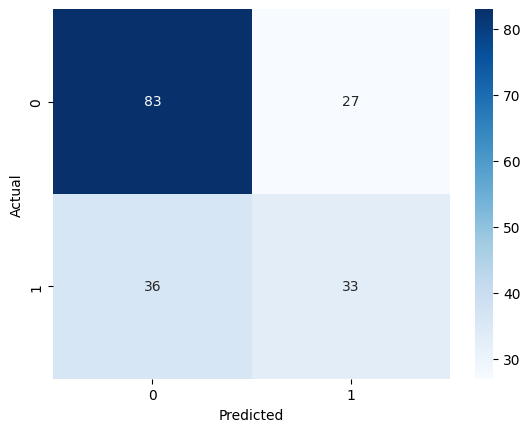

In [5]:
# Plot confusion matrix:

cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Reflection 5:
* How well did each model perform?
* Are there any surprising results?
* Why might one model outperform the others?

# Section 6. Final Thoughts & Insights

## 6.1 Summarize Findings
* What indicators are strong predictors of gender?
* Decision Tree performed well but overfit slightly on training data.
* Neural Network showed moderate improvement but introduced complexity.

## 6.2 Discuss Challenges Faced
* Small sample size could limit generalizability.
* Missing values (if any) could bias the model.

## 6.3 Next Steps
* Test more features (e.g., BMI class).
* So Try hyperparameter tuning for better results.